In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data14(1).csv')
df.head(10)

,Unnamed: 0,market,products,launch_stage,activity_level,activity_verified,pageviews,team_member,founded_by,revenue_stage,revenue_through,twitter_followers,amount_raised,company_website,description,name,founded,place,crunchbase_link,ranking
0,0,"'marketing', 'productivity', 'social networks'...","'desktop app', 'mobile app', 'service', 'web app'",Publicly,Low company activity detected,21 Jan 21,72600.0,30.5,'SocialMeep',Post,"'b2c', 'b2b', 'freemium', 'subscription'",184,Undisclosed,https://socialmeep.com?ref=startuptracker,'SocialMeep builds automatic growth and market...,'SocialMeep',March 3 2018,New York US,https://www.crunchbase.com/organization/social...,66100
1,1,"'design', 'education', 'software dev'",'web app',Publicly,High company activity detected,15 Jan 21,18900.0,4.0,'DesignerUp',Pre,"'b2c', 'free to use', 'sales'",590,Undisclosed,http://DesignerUp.co?ref=startuptracker,'An ecosystem of UI/UX and product design reso...,'DesignerUp',October 21 2018,San Francisco US,https://angel.co/company,252000
2,2,"'advertising', 'marketing', 'startups', 'content'",'web app',Publicly,High company activity detected,14 Jan 21,1700.0,4.0,"'strategynode', 'Tyler J. Fox'",Pre,"'b2c', 'b2b', 'free to use'",7,Undisclosed,https://katang.io/?t_pid=2?ref=startuptracker,'KaTang is an end-to-end content marketing pla...,'KaTang',November 1 2019,Lehi US,https://www.crunchbase.com/organization/katang,2700000
3,3,"'advertising', 'e commerce', 'media', 'content'","'mobile app', 'web app'",Publicly,High company activity detected,30 Dec 20,5000.0,7.5,"'Rad Padre', 'Freedom TV+'",Pre,"'b2c', 'free to use', 'commission', 'affiliation'",11,Undisclosed,https://www.freedomrains.com/?ac=218B21?ref=st...,'Shopping assistant browser extension that pro...,"'Above & Beyond Studios, Inc.'",June 26 2019,Boston US,https://producthunt.com/posts/freedom-super-sa...,945700
4,4,"'security', 'blockchain'",'mobile app',Publicly,No recent company activity detected,29 Dec 20,957.0,7.5,'VyrocApp',Post,"'b2c', 'free to use', 'advertising', 'subscrip...",17,Undisclosed,http://vyrocapp.com?ref=startuptracker,"'Private Search Engine, Powered by the Blockch...",'Vyroc',January 1 2020,New York US,https://www.crunchbase.com/organization/vyroc,4800000
5,5,"'communication', 'marketing', 'startups', 'sales'","'service', 'web app'",Privately,High company activity detected,5 Dec 20,2800.0,30.5,'Chris Beaman',Post,"'b2b', 'freemium', 'sales', 'subscription'",29,Self,https://www.astronomic.com?ref=startuptracker,'We connect founders and help them grow','Astronomic',June 1 2020,Austin US,https://startuptracker.io,1700000
6,6,"'data', 'productivity', 'startups', 'content'","'other', 'desktop app', 'mobile app', 'web app'",Pre,High company activity detected,3 Dec 20,2100.0,7.5,'Snipply',Pre,"'b2c', 'b2b', 'freemium', 'subscription'",110,Undisclosed,http://www.snipply.io?ref=startuptracker,'Snipply connects the content inside the apps ...,'Snipply',June 1 2019,New York US,https://startuptracker.io,2200000
7,7,"'analytics', 'manufacturing', 'productivity', ...","'desktop app', 'web app'",Privately,High company activity detected,25 Nov 20,8300.0,30.5,'Angshuman Guha',Pre,"'b2b', 'affiliation', 'freemium', 'sales'",92,Undisclosed,https://bipp.io/?ref=startuptracker,"'bipp is an enterprise-grade, cloud business i...",'bipp Analytics',July 15 2017,Plano US,https://www.crunchbase.com/organization/bipp-a...,566200
8,8,"'productivity', 'accounting and legal', 'ai', ...","'desktop app', 'mobile app', 'web app'",Privately,High company activity detected,23 Nov 20,0.0,4.0,'agreemint',Pre,"'b2c', 'b2b', 'freemium', 'sales', 'subscription'",31,Undisclosed,https://www.agreemint.com?ref=startuptracker,'Through the Agreemint Contract AI users engag...,'Agreemint',February 10 2018,San francisco US,https://www.crunchbase.com/organization/agreemint,0
9,9,'software dev',"'mobile app', 'web app'",Publicly,High company activity detected,11 Nov 20,4600.0,7.5,'Shake SDK',Pre,"'b2b', 'freemium'",16,Undisclosed,ht

### I am going to consider **Page Views** column in the dataset as my target variable.

Ideally, **Amount_Raised** column should be considered as the target variable but since it has more than 50% of Undisclosed values, it would be pointless to put it as a target variable.

So, apart from this, **Page Views** is the one column which can be vaguely used to identify the popularity and success of startups so I am using this

# Choosing Features manually based on their names and relation with the success of startups

In [5]:
dfa = df[['launch_stage','activity_level','pageviews','team_member','revenue_stage','twitter_followers','amount_raised','ranking']]
dfa.head(10)

,launch_stage,activity_level,pageviews,team_member,revenue_stage,twitter_followers,amount_raised,ranking
0,Publicly,Low company activity detected,72600.0,30.5,Post,184,Undisclosed,66100
1,Publicly,High company activity detected,18900.0,4.0,Pre,590,Undisclosed,252000
2,Publicly,High company activity detected,1700.0,4.0,Pre,7,Undisclosed,2700000
3,Publicly,High company activity detected,5000.0,7.5,Pre,11,Undisclosed,945700
4,Publicly,No recent company activity detected,957.0,7.5,Post,17,Undisclosed,4800000
5,Privately,High company activity detected,2800.0,30.5,Post,29,Self,1700000
6,Pre,High company activity detected,2100.0,7.5,Pre,110,Undisclosed,2200000
7,Privately,High company activity detected,8300.0,30.5,Pre,92,Undisclosed,566200
8,Privately,High company activity detected,0.0,4.0,Pre,31,Undisclosed,0
9,Publicly,High company activity detected,4600.0,7.5,Pre,16,Undisclosed,1000000


Let us go through each column to see if we need to handle anything like unknown or contradicting values and try to convert categorical variables into numerical variables

In [6]:
dfa['launch_stage']

0         Publicly
1         Publicly
2         Publicly
3         Publicly
4         Publicly
          ...     
633       Publicly
634       Publicly
635           Self
636           $20k
637    Undisclosed
Name: launch_stage, Length: 638, dtype: object

In [7]:
dfa['launch_stage'].value_counts()

Publicly       453
Privately      109
Pre             73
Undisclosed      1
$20k             1
Self             1
Name: launch_stage, dtype: int64

These are the various labels present in the launch-stage column. Let us now establish an ordinal scaling with the different values here.

Let us assume that the column is ordinal in nature where
* Public Launch Stage> Pre Launch Stage> Private Launch Stage> $20k> Self> Undisclosed 

In [8]:
dfa['launch_stage'].replace({'Publicly': 6,'Pre':5,'Privately':4,'$20k':3,'Self':2,'Undisclosed':1},inplace=True)
type(dfa['launch_stage'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


pandas.core.series.Series

In [9]:
dfa['launch_stage']

0      6
1      6
2      6
3      6
4      6
      ..
633    6
634    6
635    2
636    3
637    1
Name: launch_stage, Length: 638, dtype: int64

## Let us move on with the next column

In [10]:
dfa['activity_level']

0            Low company activity detected
1           High company activity detected
2           High company activity detected
3           High company activity detected
4      No recent company activity detected
                      ...                 
633             Sourced by Startup Tracker
634         High company activity detected
635    No recent company activity detected
636             Sourced by Startup Tracker
637             Sourced by Startup Tracker
Name: activity_level, Length: 638, dtype: object

In [11]:
dfa['activity_level'].value_counts()

High company activity detected         301
No recent company activity detected    232
Low company activity detected           65
Sourced by Startup Tracker              40
Name: activity_level, dtype: int64

Once again, **activity_level** of the startup is an ordinal categorical feature as Startups which have greater activity level has much success rate compared to dormant startups

Here the ordinal scale is like
* High activity> Low Activity> No recent activity> Sourced by Tracker

In [12]:
dfa['activity_level'].replace({'High company activity detected': 4,'Low company activity detected':3,'No recent company activity detected':2,'Sourced by Startup Tracker':1},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
dfa['activity_level']

0      3
1      4
2      4
3      4
4      2
      ..
633    1
634    4
635    2
636    1
637    1
Name: activity_level, Length: 638, dtype: int64

## Moving on

In [14]:
dfa['pageviews']

0        72600.0
1        18900.0
2         1700.0
3         5000.0
4          957.0
         ...    
633          0.0
634    1200000.0
635       1200.0
636       3700.0
637       7400.0
Name: pageviews, Length: 638, dtype: float64

In [15]:
dfa['pageviews'].unique()

array([7.260e+04, 1.890e+04, 1.700e+03, 5.000e+03, 9.570e+02, 2.800e+03,
       2.100e+03, 8.300e+03, 0.000e+00, 4.600e+03, 4.000e+03, 4.400e+03,
       1.800e+03, 6.480e+02, 2.200e+03, 4.100e+03, 6.780e+02, 1.000e+03,
       3.000e+03, 5.600e+03, 6.500e+03, 2.380e+02, 9.790e+02, 1.010e+04,
       1.680e+04, 6.260e+04, 4.900e+03, 1.300e+03, 9.000e+00, 2.300e+03,
       2.371e+05, 4.720e+04, 1.110e+04, 7.300e+03, 1.310e+04, 3.700e+03,
       6.180e+04, 7.640e+04, 1.500e+03, 1.200e+03, 9.600e+03, 1.108e+05,
       3.400e+03, 1.008e+05, 6.520e+02, 1.401e+05, 2.650e+04, 2.020e+04,
       3.010e+04, 5.700e+03, 4.050e+04, 1.090e+04, 1.466e+05, 1.100e+01,
       1.020e+04, 4.850e+04, 9.100e+03, 4.500e+03, 2.230e+04, 1.420e+04,
       1.000e+04, 7.409e+05, 6.450e+02, 7.700e+02, 1.341e+05, 4.430e+04,
       6.740e+02, 5.580e+04, 9.800e+03, 1.989e+05, 3.600e+03, 4.282e+05,
       2.380e+04, 1.180e+04, 3.830e+04, 7.140e+02, 5.300e+03, 5.600e+04,
       1.740e+04, 6.100e+03, 3.680e+04, 1.440e+04, 

It seems there are no null and unusual values in the column so there's no need to clean the data

In [16]:
dfa['team_member']

0      30.5
1       4.0
2       4.0
3       7.5
4       7.5
       ... 
633     7.5
634    30.5
635     3.0
636     4.0
637     2.0
Name: team_member, Length: 638, dtype: float64

Nothing here as well so moving on

In [17]:
dfa['revenue_stage']

0        Post
1         Pre
2         Pre
3         Pre
4        Post
        ...  
633       Pre
634       Pre
635       559
636      1.3m
637    640.5k
Name: revenue_stage, Length: 638, dtype: object

In [18]:
dfa['revenue_stage'].value_counts()

Pre       521
Post      114
1.3m        1
640.5k      1
559         1
Name: revenue_stage, dtype: int64

Let us understand the terms of **Pre revenue Stage** and **Post Revenue Stage** before deciding on the ordinality order of the categorical values


**Pre Revenue Stage** :- Any stage where you do not have revenue streams from the product or service you sell.

You can be early-stage and not have revenues, you can be later stage and not have revenues, however such later stage companies are likely developing hard technology which takes a long time. For example a team of scientists working on nanostructured materials.

Usually, the **pre revenue** falls into early-stage of startup life cycle.

**Post Revenue Stage** :- As a post-revenue startup company, you have begun to generate sales and are now working through the stages of efficiency and scale. In the efficiency stage, your sales and marketing processes are refined and you are generating consistent and growing revenues. You tweak your product based on customer feedback, and start to explore new customer and partner channels. In the scale stage, you achieve massive exponential sales growth as you scale your business through new channels and geographies. At this point you are making executive team hires and raising larger rounds of investment to continue to grow.




To sum things up briefly:-

1. Pre-Revenue stage is when the startup is just starting and there's no sales generated

2. Post Revenue Stage is when the startup is evolving and there is consistent sales and profits.




**So the ordinality order will be:-**

* Post> Pre> 1.3m> 643k> 559

In [19]:
dfa['revenue_stage'].replace({'Post':5,'Pre':4,'1.3m':3,'640.5k':2,'559':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
dfa['revenue_stage'].value_counts()

4    521
5    114
3      1
2      1
1      1
Name: revenue_stage, dtype: int64

## Moving on

In [21]:
dfa['twitter_followers']

0        184
1        590
2          7
3         11
4         17
       ...  
633     1100
634    69700
635     1200
636        9
637        9
Name: twitter_followers, Length: 638, dtype: int64

In [22]:
dfa['amount_raised']

0      Undisclosed
1      Undisclosed
2      Undisclosed
3      Undisclosed
4      Undisclosed
          ...     
633            $1m
634          $1.3m
635             4m
636          ~3.7k
637          ~7.4k
Name: amount_raised, Length: 638, dtype: object

In [23]:
dfa['amount_raised'].value_counts()

Undisclosed    468
Self           117
$1m              3
$250k            3
$4m              2
$150k            2
$1.3m            2
$10k             2
$795k            2
4m               1
$1.1m            1
$500k            1
$11.6m           1
$25m             1
$1               1
$956.7k          1
$119m            1
$200k            1
~3.7k            1
$6m              1
$41.2m           1
$77.6m           1
$26k             1
$9.7m            1
$9m              1
$815k            1
$5m              1
$3m              1
$100k            1
$6.8m            1
$1.8m            1
$100b            1
$18.6m           1
$800k            1
$20m             1
$5               1
$4.2m            1
$7               1
~7.4k            1
$29.1m           1
$12m             1
$350k            1
$65k             1
$22.7k           1
$8m              1
$26.6k           1
Name: amount_raised, dtype: int64

In [24]:
dfa['ranking']

0        66100
1       252000
2      2700000
3       945700
4      4800000
        ...   
633          0
634       4200
635    4000000
636    1300000
637     640500
Name: ranking, Length: 638, dtype: int64

## Proceeding with Model Building

In [1]:
!pip install pycaret

  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached scipy-1.5.4-cp37-cp37m-win_amd64.whl (31.2 MB)
  Using cached spacy-2.3.7-cp37-cp37m-win_amd64.whl (9.6 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
  Using cached pyod-0.9.0-py3-none-any.whl
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached mlflow-1.19.0-py3-none-any.whl (14.4 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Ins

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\anaconda\\lib\\site-packages\\scipy\\~libs\\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.



  Using cached pandas-1.3.0-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached thinc-7.4.5-cp37-cp37m-win_amd64.whl (888 kB)
  Using cached preshed-3.0.5-cp37-cp37m-win_amd64.whl (108 kB)
  Using cached srsly-1.0.5-cp37-cp37m-win_amd64.whl (176 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached blis-0.7.4-cp37-cp37m-win_amd64.whl (6.5 MB)
  Using cached cymem-2.0.5-cp37-cp37m-win_amd64.whl (35 kB)
  Using cached murmurhash-1.0.5-cp37-cp37m-win_amd64.whl (20 kB)
  Using cached waitress-2.0.0-py3-none-any.whl (56 kB)
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using cached prometheus_flask_exporter-0.18.2-py3-none-any.whl
  Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
  Using cached alembic-1.4.1-py2.

In [26]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)


In [27]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'pageviews', session_id=123)

,Description,Value
0,session_id,123
1,Target,pageviews
2,Original Data,"(574, 20)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(401, 290)"


In [28]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,5.327910e+04,5.021046e+11,2.755517e+05,-1.663000e-01,4.3117,9.685000e-01,0.038
knn,K Neighbors Regressor,6.215012e+04,5.628618e+11,3.675803e+05,-5.287300e+00,2.1261,6.562700e+00,0.068
br,Bayesian Ridge,8.961208e+04,5.013350e+11,2.899662e+05,-8.774300e+00,5.9465,1.573795e+03,0.044
rf,Random Forest Regressor,7.497367e+04,6.712677e+11,4.073339e+05,-1.988990e+01,3.0100,5.317100e+01,0.800
en,Elastic Net,1.039543e+05,5.052784e+11,3.135886e+05,-2.343220e+01,5.9018,2.799983e+03,0.066
ada,AdaBoost Regressor,9.706202e+04,9.920309e+11,4.740287e+05,-2.669560e+01,5.0563,4.765174e+02,0.107
gbr,Gradient Boosting Regressor,8.279114e+04,9.896631e+11,4.822370e+05,-2.878540e+01,3.3737,4.231010e+01,0.183
dt,Decision Tree Regressor,8.728857e+04,9.966111e+11,5.039602e+05,-4.151060e+01,2.3301,1.792410e+01,0.025
lightgbm,Light Gradient Boosting Machine,1.136357e+05,5.145561e+11,3.721513e+05,-4.443820e+01,5.7139,4.282457e+03,0.092
et,Extra Trees Regressor,9.503697e+04,9.914898e+11,5.091401e+05,-4.453480e+01,3.5108,5.340440e+01,1.102


## Huber Regressor got the best values so let us choose this

In [29]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6878.1231,5.585002e+08,2.363261e+04,-0.0951,3.7129,0.8859
1,22906.7776,6.727479e+09,8.202121e+04,-0.0860,4.4820,0.8735
2,4559.1383,6.193482e+07,7.869868e+03,-0.5224,3.6077,0.8896
3,35797.1155,1.216807e+10,1.103090e+05,-0.1188,4.8321,0.9143
4,43178.6916,2.431566e+10,1.559348e+05,-0.0833,4.7513,1.0772
5,364353.8467,4.971453e+12,2.229676e+06,-0.0275,4.7353,0.9317
6,12228.1670,9.597008e+08,3.097904e+04,-0.1885,4.2208,0.8938
7,12838.4632,1.725595e+09,4.154028e+04,-0.1053,3.9539,1.2053
8,10392.1607,5.361846e+08,2.315566e+04,-0.2544,4.1801,1.0382
9,19658.5394,2.540012e+09,5.039853e+04,-0.1820,4.6410,0.9756


In [30]:
print(huber)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [31]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6878.1266,5.585003e+08,2.363261e+04,-0.0951,3.7129,0.8859
1,22906.8072,6.727480e+09,8.202122e+04,-0.0860,4.4823,0.8735
2,4559.1413,6.193489e+07,7.869872e+03,-0.5224,3.6078,0.8896
3,35797.0952,1.216807e+10,1.103090e+05,-0.1188,4.8321,0.9143
4,43178.6668,2.431566e+10,1.559348e+05,-0.0833,4.7514,1.0771
5,364353.8508,4.971453e+12,2.229676e+06,-0.0275,4.7354,0.9317
6,12228.1702,9.597008e+08,3.097904e+04,-0.1885,4.2208,0.8938
7,12837.8809,1.725594e+09,4.154027e+04,-0.1053,3.9546,1.2036
8,9252.9621,4.356848e+08,2.087307e+04,-0.0193,3.7052,1.6269
9,19658.5368,2.540012e+09,5.039853e+04,-0.1820,4.6409,0.9756


In [32]:
print(tuned_huber)

HuberRegressor(alpha=0.9, epsilon=1.2, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)


In [33]:
predict_model(tuned_huber);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,662682.8963,7.394134e+13,8.598915e+06,-0.006,3.8249,0.8613


In [34]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [35]:
from sklearn.linear_model._huber import HuberRegressor

In [36]:
hu = HuberRegressor(alpha=0.9, epsilon=1.9, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dfa.drop({'amount_raised','pageviews'},axis=1),dfa['pageviews'],test_size=0.1,random_state=0)
X_train

,launch_stage,activity_level,team_member,revenue_stage,twitter_followers,ranking
585,6,4,4.0,4,1100,0
272,6,4,1.0,4,9,0
593,4,2,2.0,4,59,0
569,6,2,30.5,4,4000,0
384,6,4,30.5,4,1100,527200
...,...,...,...,...,...,...
9,6,4,7.5,4,16,1000000
359,4,2,1.0,4,74,0
192,4,1,7.5,4,5,1900000
629,4,2,30.5,4,114,0


In [43]:
hu.fit(X_train,y_train)
y_pred = hu.predict(X_test)

In [44]:
y_pred

array([-2.79357184e-04,  1.80072212e+03,  3.99969688e+02, -2.70521752e-02,
       -2.60844350e-03,  1.04879892e+02,  2.32821588e+01,  1.17823670e+03,
       -1.08654887e-03,  1.09753489e+02, -1.49083034e-01,  6.66902924e+02,
       -2.77833647e-04,  1.12839440e+03, -9.29687332e-05,  4.44777710e+01,
       -1.02179166e-02,  3.11203143e+02, -2.79020341e-04, -2.48315925e-04,
        1.77821937e+03,  9.63021149e+00, -2.54682671e-01,  6.44680103e+02,
       -2.77818871e-04,  1.04486699e+03, -1.08683390e-03, -9.00531274e-04,
        1.57841756e+03,  4.00128088e+02,  5.31831640e+01,  1.55017386e+02,
        1.25003664e+02,  1.06709881e+03,  2.66768686e+02, -1.40369667e-02,
        1.08929641e+03,  3.55698725e+02, -2.10547691e-02,  4.74677756e+01,
       -2.14273876e-03,  1.24494892e+03,  3.94608727e+01,  2.01088069e+02,
        9.55942169e+02,  4.92524860e+01,  1.88962092e+03,  1.11152765e+03,
       -2.79335019e-04,  5.35509208e+02,  2.88982284e+02,  6.66936746e+02,
        5.33549454e+02, -

In [45]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1773031.8057606814


In [46]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 199869182582918.6


In [47]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 14137509.773044141


In [48]:
import pickle

In [49]:
filename = 'finalized_model.sav'
pickle.dump(hu, open(filename, 'wb'))

In [50]:
importance = hu.coef_
importance

array([ 1.26014949e-08,  7.38842445e-09,  5.18220245e-08,  9.35143703e-09,
       -3.10590739e-05,  2.22312362e-04])

In [51]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.9f' % (i,v))

Feature: 0, Score: 0.000000013
Feature: 1, Score: 0.000000007
Feature: 2, Score: 0.000000052
Feature: 3, Score: 0.000000009
Feature: 4, Score: -0.000031059
Feature: 5, Score: 0.000222312


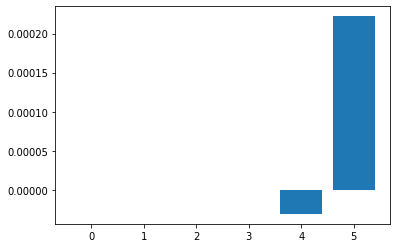

In [52]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()